In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
path_to_userDataPrediction = '../../models/UserDatapredictions.npy'
path_to_eNodeBPrediction = '../../models/eNodeBpredictions.npy'

In [12]:
# Load predictions from UserDetectionModel
user_behavior_predictions = np.load(path_to_userDataPrediction)

# Load predictions from eNodeB-model
enodeb_peak_predictions = np.load(path_to_eNodeBPrediction)

In [13]:
# # Create a DataFrame
# data = {
#     'Hour': range(24),  # Assuming predictions for each hour of the day
#     'UserBehavior': user_behavior_predictions,
#     'eNodeBPredictions': enodeb_peak_predictions
# }

# df = pd.DataFrame(data)

# # Display the DataFrame
# print(df.head())

In [14]:
# df.shape

# dynamic pricing algorithm init

In [15]:
# Sample baseline price for MTN data plan (in Naira)
baseline_price = 10  # Baseline price per unit of data in Naira
peak_multiplier = 1.2  # 20% increase during peak periods
off_peak_discount = 0.8  # 20% discount during off-peak periods

In [16]:
# user_behavior_predictions = np.random.rand(24)  # Placeholder for user behavior predictions
# enodeb_peak_predictions = np.random.randint(0, 2, 24)  # Placeholder for eNodeB peak predictions

In [17]:
# Adjust prices dynamically based on predictions
def adjust_prices(user_predictions, peak_predictions):
    prices = []
    for user_pred, peak_pred in zip(user_predictions, peak_predictions):
        if peak_pred == 1:  # Peak period
            price = baseline_price * peak_multiplier
        else:  # Off-peak period
            price = baseline_price * off_peak_discount
        prices.append(price)
    return prices

In [18]:
# Generate adjusted prices
# adjusted_prices = adjust_prices(user_behavior_predictions, enodeb_peak_predictions)

In [19]:
# adjust_prices

In [20]:
# # Plot the adjusted prices over time to visualize dynamic pricing adjustments
# plt.figure(figsize=(12, 6))
# plt.plot(adjusted_prices, label='Adjusted Prices')
# plt.xticks(ticks=np.arange(24), labels=[f"{i}:00" for i in range(24)], rotation=45)
# plt.xlabel('Hour of the Day')
# plt.ylabel('Price per Unit of Data (₦)')
# plt.title('Dynamic Pricing Adjustments Over Time (MTN Nigeria)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [21]:
# Generate adjusted prices
dynamic_prices = adjust_prices(user_behavior_predictions, enodeb_peak_predictions)

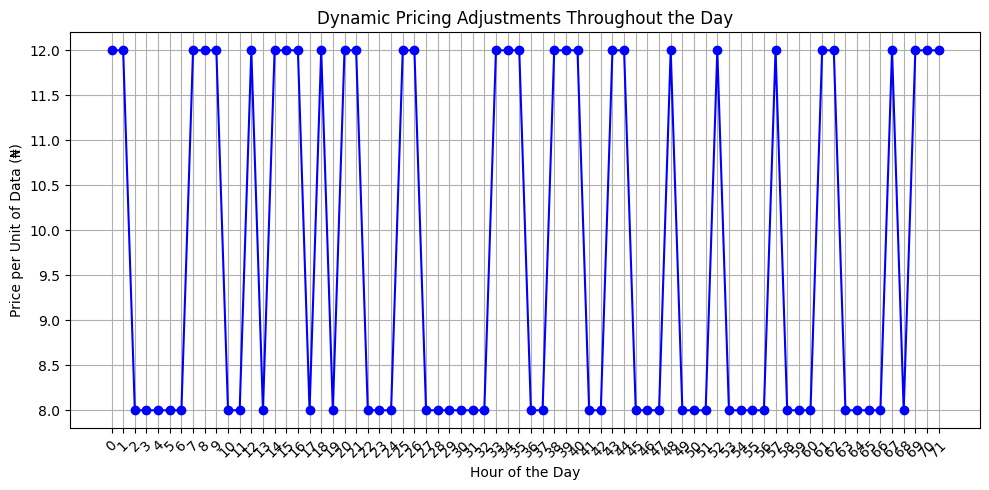

In [23]:
# Example Hour array assuming hourly predictions for a full day
hours = np.arange(len(dynamic_prices))  # replace with actual hour data if available

plt.figure(figsize=(10, 5))
plt.plot(hours, dynamic_prices, marker='o', linestyle='-', color='b')
plt.title('Dynamic Pricing Adjustments Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Price per Unit of Data (₦)')
plt.grid(True)
plt.xticks(hours, rotation=45)  # Ensure all hours are labeled for better readability
plt.tight_layout()
plt.show()

# QoS metric

In [24]:
# Here you would replace these with functions that calculate real QoS based on network load and user demand
latency = 1 / (1 + user_behavior_predictions)  # Simplified latency calculation
throughput = 1 - user_behavior_predictions  # Simplified throughput calculation

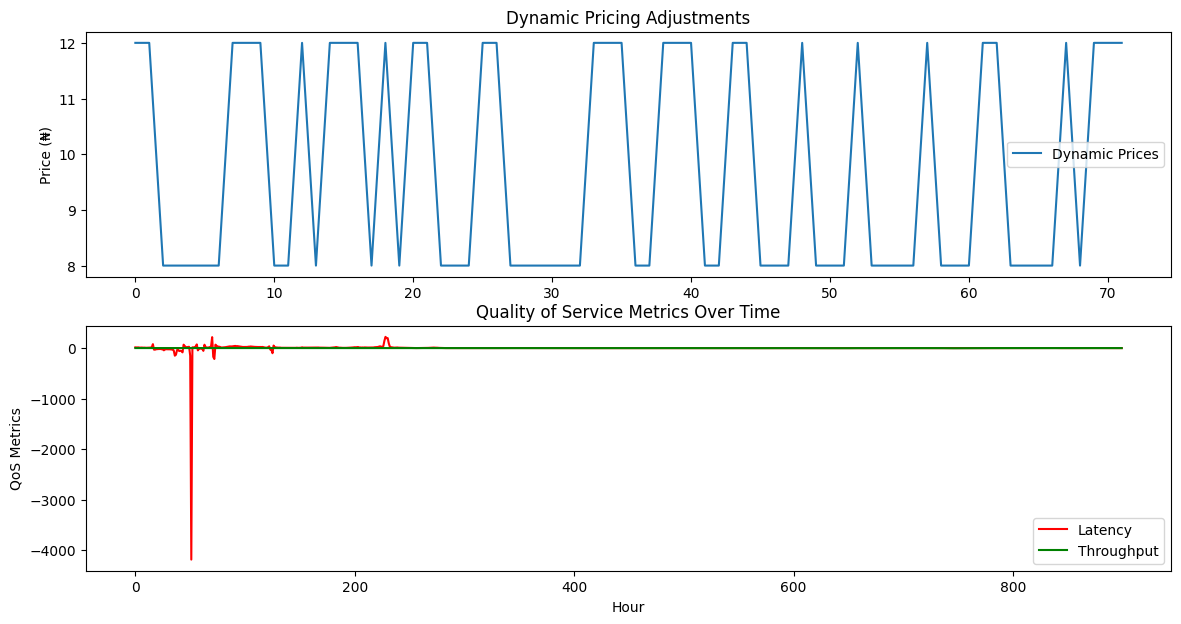

In [32]:
# Plotting results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(dynamic_prices, label='Dynamic Prices')
plt.title('Dynamic Pricing Adjustments')
# plt.xlabel('Hour')
plt.ylabel('Price (₦)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(latency, label='Latency', color='r')
plt.plot(throughput, label='Throughput', color='g')
plt.xlabel('Hour')
plt.ylabel('QoS Metrics')
plt.title('Quality of Service Metrics Over Time')
plt.legend()
plt.show()